*  로지스틱 회귀: 선형 회귀처럼 기본 분석 모델 중에 하나이다.  로지스틱 회귀 분석은 알고리즘의 근간을 선형 회귀 분석에 두고 있어서 선형 회귀 분석과 상당히 유사지만 다르는 문제가 다르다.

* 장점:
    * 선형 회귀 분석만큼 구현하기 용이하다.
    * 계수(기울기)를 사용해 각 변수의 중요성을 쉽게 파악할 수 있다.
* 단점:
    * 선형 회귀 분석을 근간으로 하고 있기 때문에, 선형 관계가 아닌 데이터에 대한 예측력이 떨어진다.


## 5.1 문제 정의 : 한눈에 보는 예측 목표

* 미션: 타이타닉 승객 정보 데이터셋을 이용해 생존 여부를 예측한다.
* 데이터셋 소개: 타이타닉에 승객의 정보를 담은 데이터셋이다. 각 승객 정보(이름, 성별, 나이, 티켓 번호 등)를 활용하여 생존 여부를 예측한다.


## 5.2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

## 5.3 데이터 확인하기

In [2]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [3]:
data.info() # 변수 특징 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [4]:
# 데이터 통계 정보 출력
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [5]:
# 상관관계 출력
data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

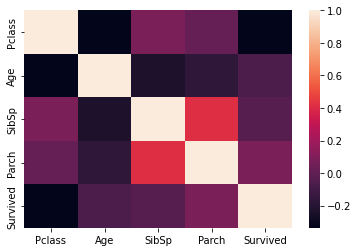

In [7]:
sns.heatmap(data.corr())
plt.show()

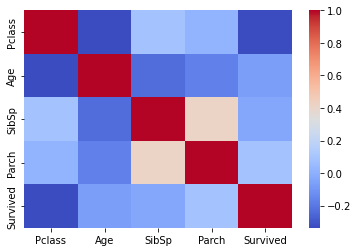

In [8]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

<AxesSubplot:>

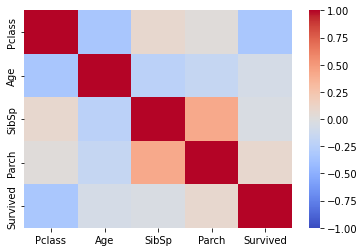

In [9]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

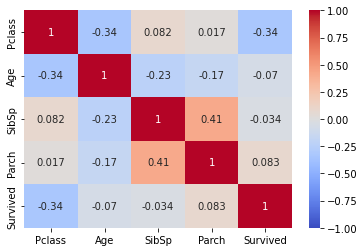

In [10]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## 5.4 전처리 : 범주형 변수 변환하기(더미 변수와 원-핫 인코딩)

In [11]:
data['Name'].nunique()

889

In [12]:
data['Sex'].nunique()

2

In [13]:
data['Ticket'].nunique()

680

In [17]:
data['Embarked'].nunique()

3

In [15]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [16]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [18]:
pd.get_dummies(data, columns=['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,0,1,0,0,1
885,1,19.0,0,0,1,1,0,0,0,1
886,3,28.0,1,2,0,1,0,0,0,1
887,1,26.0,0,0,1,0,1,1,0,0


In [19]:
pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


In [20]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

## 모델링 및 예측하기

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
pred = model.predict(X_test)

## 5.6 예측 모델 평가하기

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [25]:
model.coef_

array([[-1.18229433, -0.03992144, -0.32130675,  0.00796941, -2.56870847,
        -0.07884931, -0.2355646 ]])

In [26]:
len(model.coef_[0])

7

In [27]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182294
Age          -0.039921
SibSp        -0.321307
Parch         0.007969
Sex_male     -2.568708
Embarked_Q   -0.078849
Embarked_S   -0.235565
dtype: float64

## 5.7 이해하기 : 피처 엔지니어링

* 피처 엔지니어링이란 기존 데이터를 손보아 더 나은 변수를 만드는 기법이다. 피처 엔지니어링에서는 도메인 지식의 활용이 중요하다.  선형 회귀 분석과 로지스틱 회귀 분석을 선형 모델이라고 하는데, 이러한 선형 모델에서는 다중공선성(Multicollinearity)문제를 주의해야 한다. 다중공선성은 독립 변수 사이에 상관관계가 높은 때에 발생하는 문제이다. 예를 들어 두 독립변수 A, B는 모두 목표 변수를 양의 방향으로 이끄는 계수를 가지고 있을 때 A, B의 상관관계가 매우 높다면 y가 증가하는 이유가 A 때문인지 B 때문인지 명확하지 않다. 그래서 그때그때 데이터의 특성에 따라 변덕스러운 결과를 보여준다. 다중공선성 문제는 상관관계가 높은 변수 중 하나를 제거하거나, 둘을 모두 포괄시키는 새로운 변수를 만들거나, PCA와 같은 차원 축소를 수행해 해결할 수 있다.


In [29]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [30]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742